## FAKE NEWS DETECTION 

Welcome to the code notebook Fake News Detection with Python.

In this notebook, we focused on detecting fake news with python. We used a political dataset named "news.csv". The dataset is implemented with **TfidfVectorizer** , initialized a **PassiveAggressiveClassifier** and fit our model to predict/detect fake news.

This project is performed by **Warepam Richard Singh**

You can check him out: https://linktr.ee/richardwarepam16

Let's get started!

## Import the necessary libraries:

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import itertools

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

## Read the Data and get its shape:

In [5]:
df = pd.read_csv('/Users/macbookpro/Downloads/news.csv')

In [7]:
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


## Get the labels from the dataframe.

In [8]:
labels = df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

## EDA

In [11]:
df.isnull().head()

,Unnamed: 0,title,text,label
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


<AxesSubplot:>

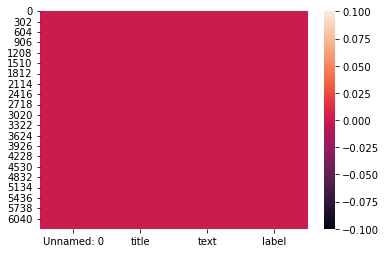

In [12]:
sns.heatmap(df.isnull())

**Seems the Dataset has no missing values**

## Let's split the dataset into training and testing sets.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], labels, test_size= 0.2 , random_state= 101)

## Initialize TfidfVectorizer

**Stop-words should be filtered out before processing into NLD(Natural Language Data). TfidVectorizer turns a collection of raw documents into a matrix of TF-IDF features.**

In [22]:
tfidf_df = TfidfVectorizer(stop_words = 'english' , max_df = 0.7)

tfidf_train = tfidf_df.fit_transform(X_train)
tfidf_test = tfidf_df.transform(X_test)

## Initialize PassiveAggressiveClassifier

In [23]:
pac= PassiveAggressiveClassifier(max_iter = 50)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [24]:
pred = pac.predict(tfidf_test)

## Let's check with Metrics:

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

score = accuracy_score(y_test, pred)
print(f'Accuracy: {round(score*100,2)}%')
print('\n')
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))

Accuracy: 93.76%


              precision    recall  f1-score   support

        FAKE       0.92      0.96      0.94       614
        REAL       0.96      0.92      0.94       653

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



[[587  27]
 [ 52 601]]


So with this model, we have **587 true positives(TP)** , **601 true negatives(TN)** , **52 false positives(FP)** , **27 false negatives(FN)**.

We end up with **93.76%** accuracy in magnitude.

## DONE!